In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('audi.csv')

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'engineSize'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

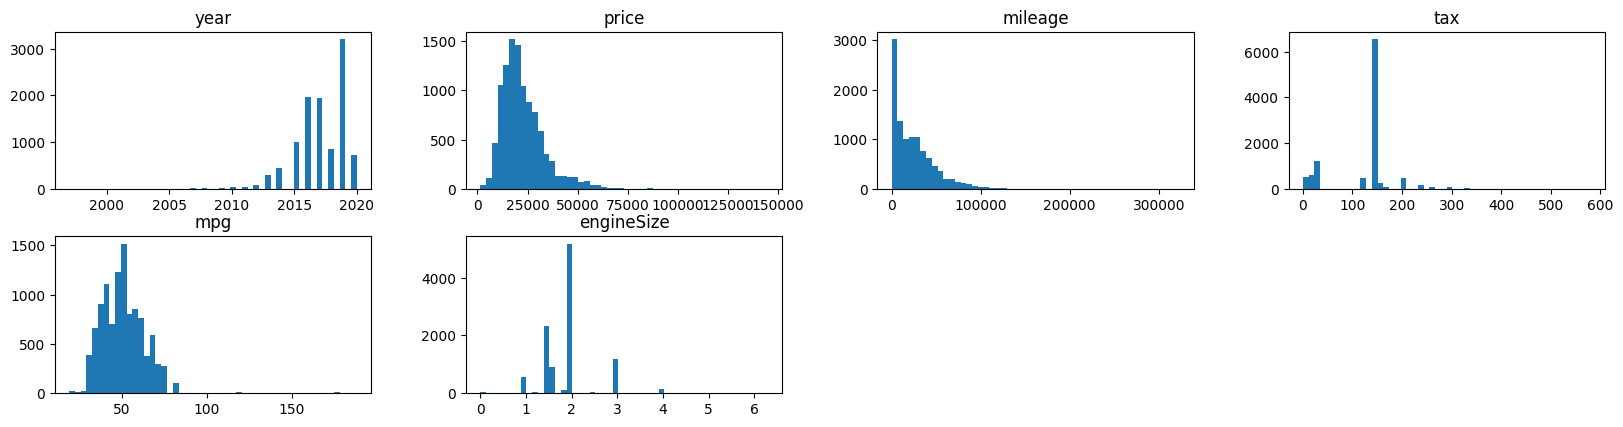

In [4]:
df.hist(figsize=(20,10), grid = False, layout=(4,4), bins = 50)

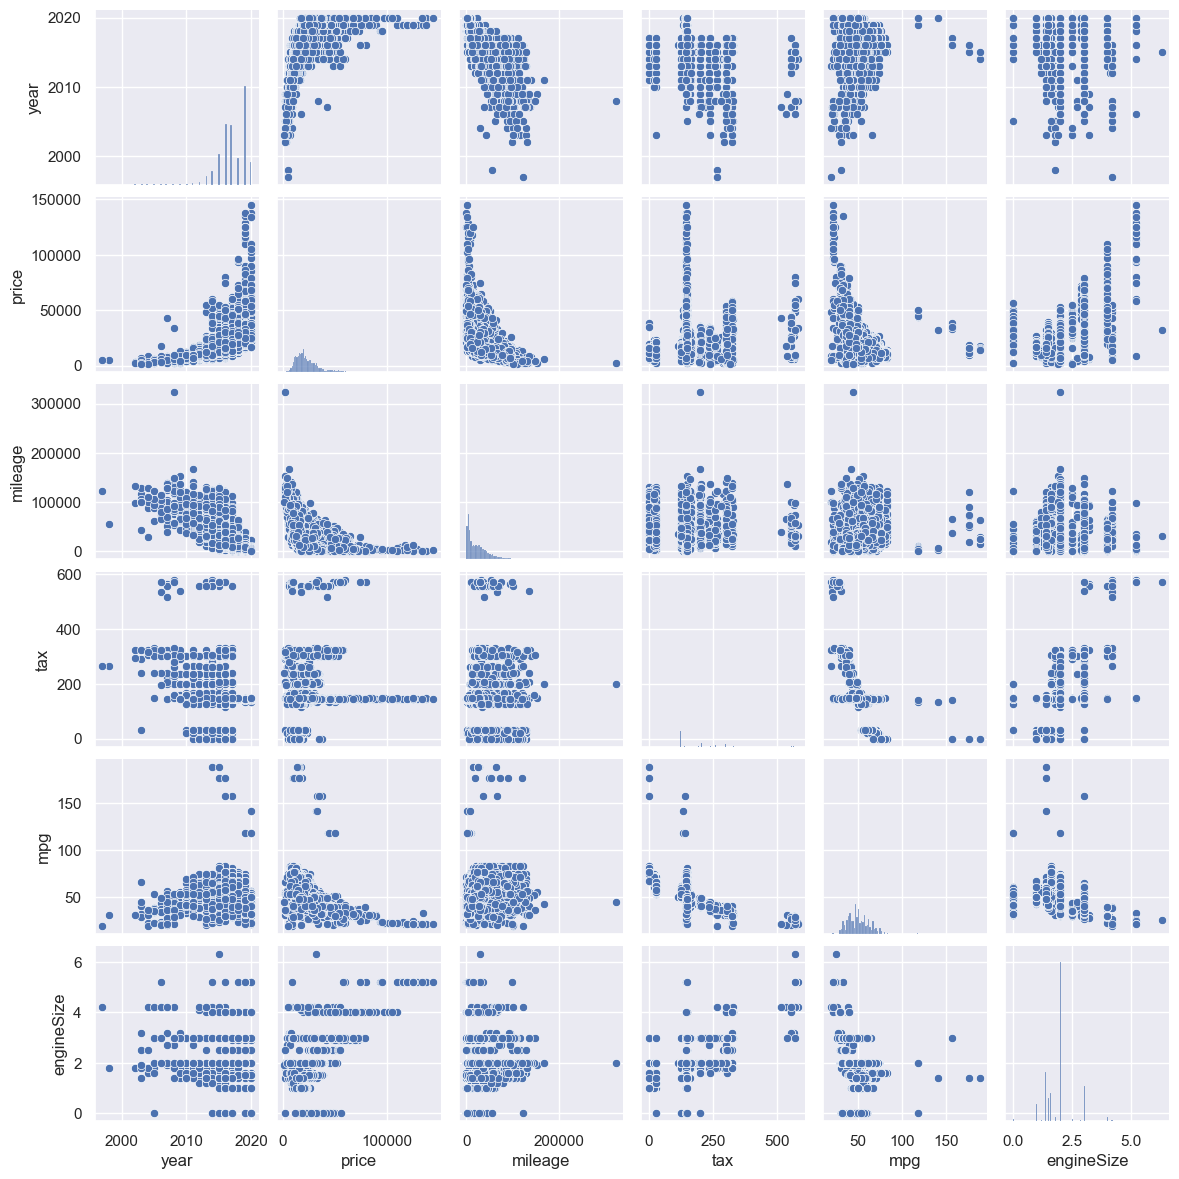

In [5]:
sns.set()
cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
sns.pairplot(df[cols], height = 2)
plt.show()

In [6]:
df=df.drop(['model'],axis=1)
df=df.drop(['transmission'],axis=1)
df=df.drop(['price'],axis=1)
X=df.drop(['fuelType'],axis=1)

Normalization

In [7]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
X

,year,mileage,tax,mpg,engineSize
0,-0.046448,-0.386817,0.357131,0.357533,-0.880177
1,-0.507810,0.483966,-1.578249,1.037081,0.114919
2,-0.507810,0.217771,-1.429373,0.357533,-0.880177
3,-0.046448,0.047851,0.282693,1.276468,0.114919
4,0.876277,-0.971240,0.282693,-0.090351,-1.543575
...,...,...,...,...,...
10663,1.337639,-0.885302,0.282693,-0.090351,-1.543575
10664,1.337639,-0.972091,0.357131,-0.090351,-1.543575
10665,1.337639,-1.030333,0.357131,-0.090351,-1.543575
10666,-0.046448,-0.688410,0.357131,-0.221627,-0.880177


Covariance Matrix

In [9]:
mean = X.mean()
deviation = X - mean
covariance_matrix = deviation.T.dot(deviation) / (len(X) - 1)

covariance_matrix

,year,mileage,tax,mpg,engineSize
year,1.000000,-0.789667,0.093066,-0.351281,-0.031582
mileage,-0.789667,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.070710,0.393075,-0.365621,1.000000


Calculating Eigen Vectors and Eigen Values

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
# eigenvalues is a 1D array containing the eigenvalues of the covariance matrix
# eigenvectors is a 2D array where each column is an eigenvector corresponding to the eigenvalue at the same index

In [11]:
#Sorting the eigenvectors by decreasing eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Converting eigenvalues to explained variance ratios
explained_variance = eigenvalues / eigenvalues.sum()

print("Eigenvalues: ", explained_variance)
print("Eigenvectors: \n", eigenvectors)
print("Eigenvectors shape: ", eigenvectors.shape)

Eigenvalues:  [0.46259565 0.30993605 0.12400512 0.06310454 0.04035864]
Eigenvectors: 
 [[-0.46373634  0.48249022 -0.26369364 -0.10806712  0.68624992]
 [ 0.48575669 -0.46716498  0.0732536   0.17892982  0.7130325 ]
 [-0.43356476 -0.43702648  0.49512711 -0.60322362  0.10954391]
 [ 0.5485194   0.22908421 -0.24802587 -0.76491314 -0.00616002]
 [-0.24522869 -0.55271001 -0.7864044  -0.08564328 -0.09277865]]
Eigenvectors shape:  (5, 5)


Cumuative Variance

In [12]:
cumulative_variance_explained = np.cumsum(explained_variance)

# Convert cumulative explained variance into percentages
cumulative_variance_explained_percentage = cumulative_variance_explained * 100
cumulative_variance_explained_percentage

array([ 46.25956452,  77.25316956,  89.65368173,  95.96413556,
       100.        ])

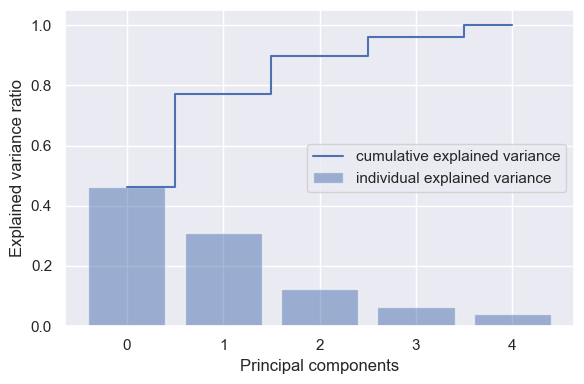

In [13]:
plt.figure(figsize=(6, 4))

plt.step(range(5), cumulative_variance_explained, where='mid',
             label='cumulative explained variance')
plt.bar(range(5), explained_variance, alpha=0.5, align='center',
        
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

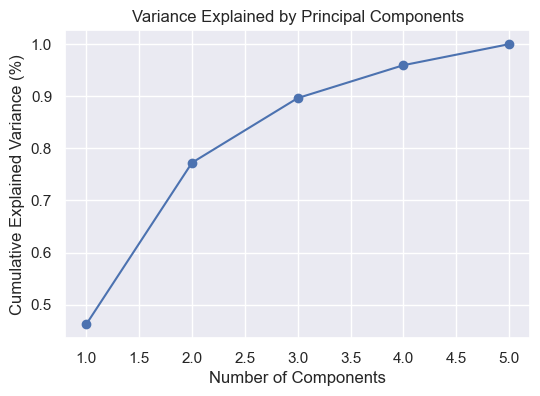

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Variance Explained by Principal Components')
plt.grid(True)
plt.show()

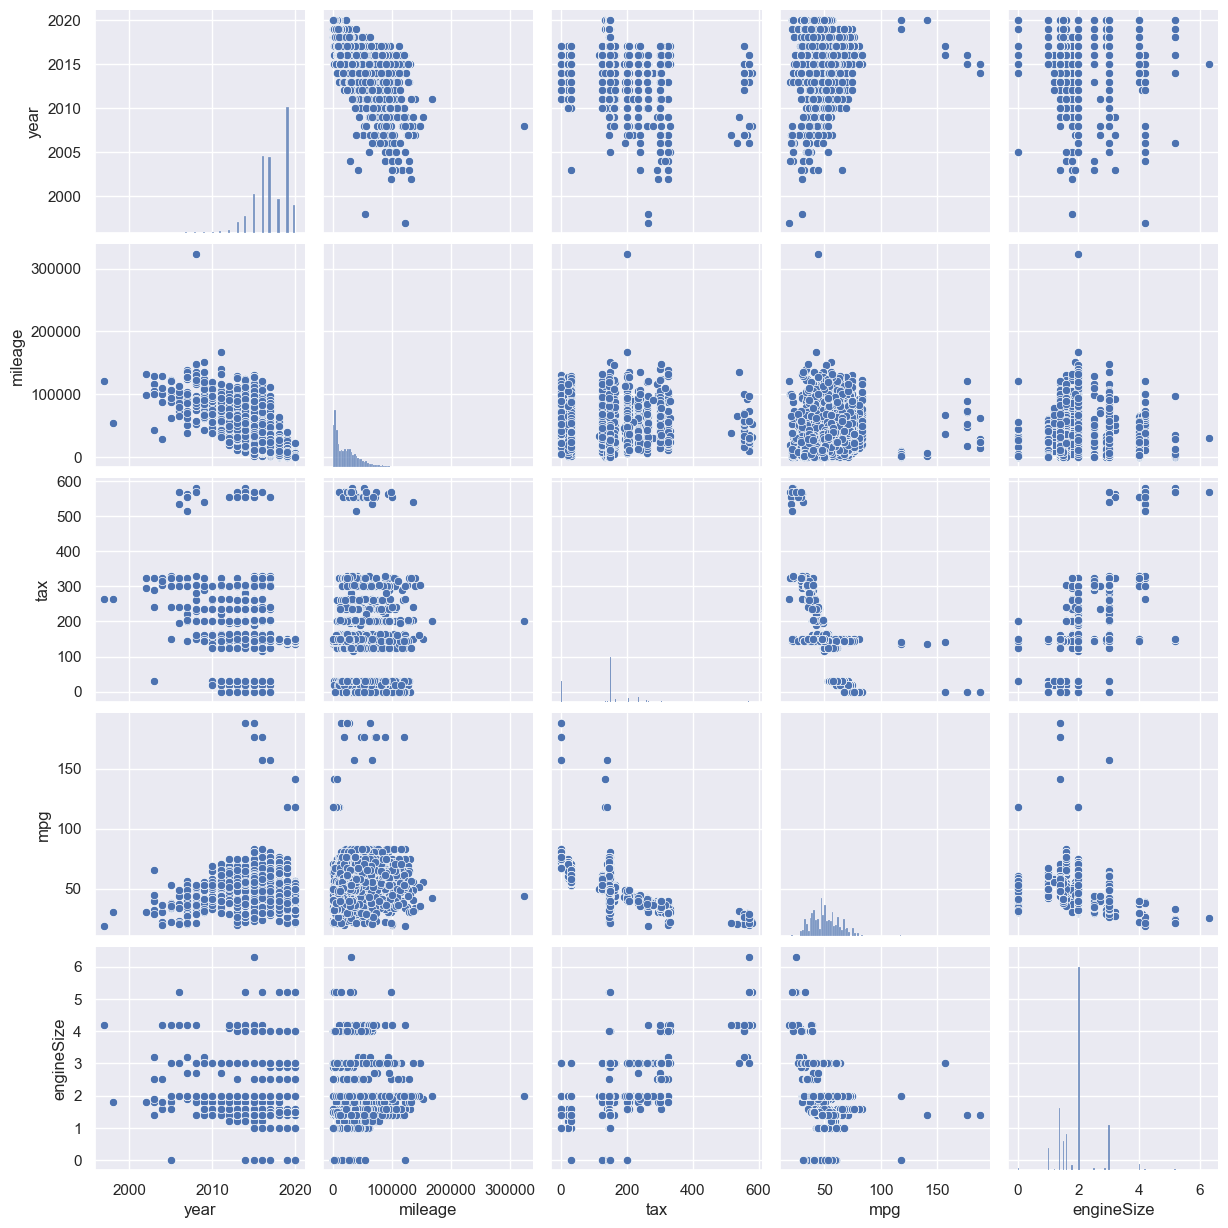

In [15]:
sns.pairplot(df)
plt.show()

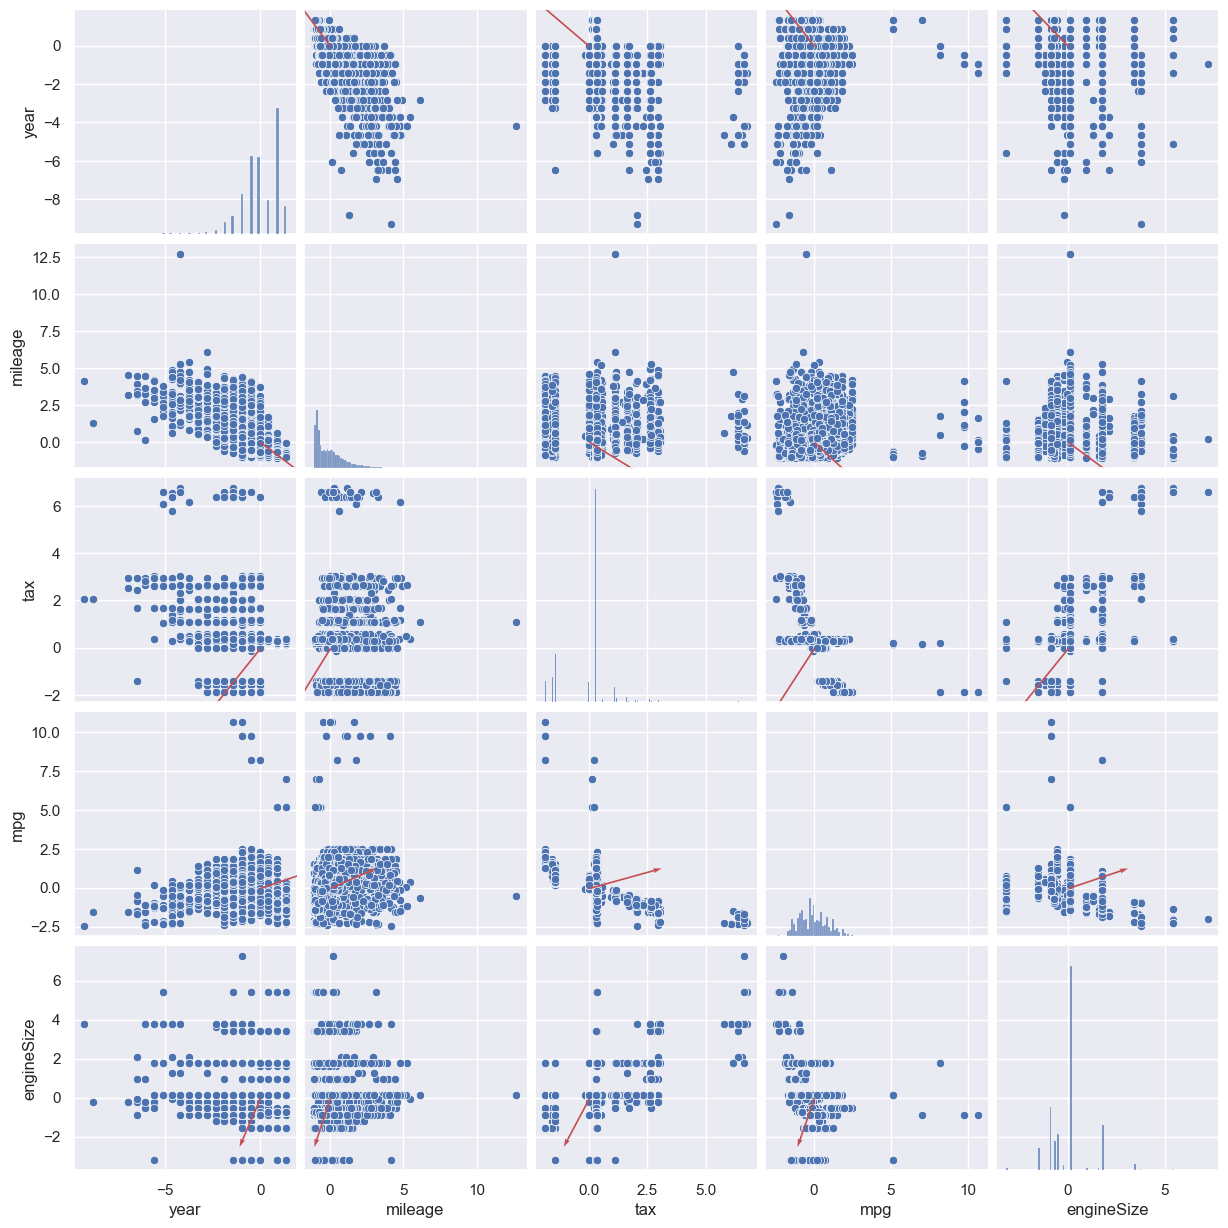

In [16]:
g = sns.pairplot(X)

axes = g.axes

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if i != j:
            pc = eigenvectors[i]
            
            pc_scaled = np.sqrt(eigenvalues[i]) * pc
            
            axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='r')

plt.show()

Conclusion:

1.Data Exploration and Visualization: Initial exploration and visualization of the 'audi.csv' dataset were conducted using histograms and pair plots. This provided an overview of feature distributions and pairwise relationships.

2.Preprocessing Steps: Certain preprocessing steps were performed on the dataset. The 'model', 'transmission', and 'price' columns were dropped, and the remaining columns were standardized to ensure equal weightage during PCA analysis.

3.Principal Component Analysis (PCA):

Covariance Matrix Calculation: The covariance matrix was computed using the standardized dataset, representing the relationships among the features.

Eigenvalue-Eigenvector Decomposition: Eigenvalues and eigenvectors were calculated from the covariance matrix.

Variance Analysis: The variance explained by each principal component and the cumulative explained variance were computed and visualized.

4.Visualizing Principal Components: Pair plots were generated to visualize the dataset and understand feature relationships. Additionally, principal components were plotted on pair plots as vectors, showcasing their direction and relative importance in the dataset.

5.Insights from PCA: The PCA process enabled understanding the significance of principal components in explaining the dataset's variance. The cumulative explained variance plot indicated the amount of information retained with each additional principal component.

6.Feature Relationships: Visual representation of principal components as vectors on pair plots revealed how they influence feature relationships and emphasized the most influential directions in the data.

Overall, the conducted PCA analysis helped in dimensionality reduction, understanding feature importance, and visualizing feature relationships within the 'audi.csv' dataset, offering insights into its underlying structure and variance distribution.